In [1]:
from modules import *
%matplotlib widget
datapicker = create_datapicker()
# %matplotlib inline
# %matplotlib notebook

### 1. Load dataset

c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE031\Lisbon_Agudo_sub-OE109031_2024-08-27T155548Z\Streams_227 could not be found.
  warnings.warn(f'Harp stream file\
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE031\Lisbon_Agudo_sub-OE109031_2024-08-27T155548Z\Streams_228 could not be found.
  warnings.warn(f'Harp stream file\
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE031\Lisbon_Agudo_sub-OE109031_2024-08-27T155548Z\Streams_229 could not be found.
  warnings.warn(f'Harp stream file

@(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE031\Lisbon_Agudo_sub-OE109031_2024-08-27T155548Z\20240827165533_OE109031_EXP4.nedf
Reading file...
Header information has been correctly retrieved.
Attempting to automatically correct eeg timestamps to harp timestamps...
Done.


c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE031\Lisbon_Agudo_sub-OE109031_2024-08-27T155548Z\Streams_211 could not be found.
  warnings.warn(f'Harp stream file\
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE031\Lisbon_Agudo_sub-OE109031_2024-08-27T155548Z\Streams_213 could not be found.
  warnings.warn(f'Harp stream file\
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE031\Lisbon_Agudo_sub-OE109031_2024-08-27T155548Z\Streams_214 could not be found.
  warnings.warn(f'Harp stream file

Dataset: <pluma.schema.Dataset object at 0x0000021ACC73F170> loaded successfully, and sucessfully calibrated.


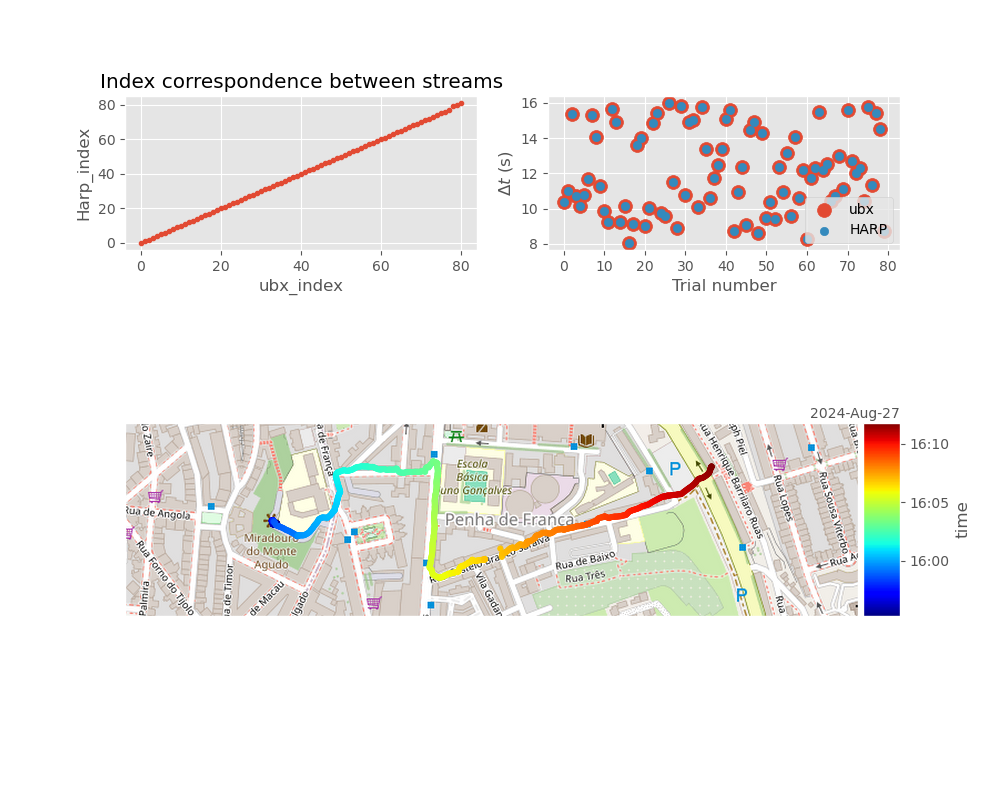

c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


Failed Stream Harp stream from device 		TK, stream GPS_Latitude(227): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_Longitude(228): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_Altitude(229): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_HasFix(232): Input dataframe is empty.


c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\em

In [40]:
data_path  = r'Z:\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE031\Lisbon_Agudo_sub-OE109031_2024-08-27T155548Z'
datapicker.reset(path = data_path)
create_dataset(datapicker = datapicker)

In [12]:
# Get participant information from file

import re

# Print the filename
path = str(datapicker.dataset.rootfolder)
path = path.split('\\')
filename = path[-1]
match = re.search(r'1(\d{2})', filename)
if match:
    # The group(1) method returns the matched string
    numbers = match.group(1)
    print(numbers)

13


#### 1.1. Bidify Datasets 

In [31]:
from pythermalcomfort.models import utci


# Create a sessions.tsv file
# session_id, acq_time, varible,...

"""Compute UTCI across whole time series
- pip install pythermalcomfort
- See docs (https://pypi.org/project/pythermalcomfort/)
UTCI:
The parameters that are taken into account for calculating UTCI involve dry bulb temperature, mean radiation temperature, the pressure of water vapor or relative humidity, and wind speed (at the elevation of 10 m above the ground).
"""

# Define custom parameters
humidity = datapicker.geodata.tk_humidity_humidity_value / 100 # in % or fraction?
wind_speed = np.sqrt(datapicker.geodata.atmos_northwind_value**2 + datapicker.geodata.atmos_eastwind_value**2) # m/s (~2.5 m of elevation)
temp_atmos= datapicker.geodata.atmos_airtemperature_value # in ºC
temp_tk = datapicker.geodata.tk_airquality_temperature_value/100 # in ºC)
temp_tk_ptc = datapicker.geodata.tk_ptc_airtemp_value/100 # positive temperature coefficient (in ºC
temp_radiant = datapicker.geodata.tk_thermocouple_temperature_value/100 # in ºC

# Assign custom parameters to the geodata attribute
datapicker.geodata['humidity'] = humidity
datapicker.geodata['wind_speed'] = wind_speed
datapicker.geodata['temp_atmos'] = temp_atmos
datapicker.geodata['temp_tk'] = temp_tk
datapicker.geodata['temp_tk_ptc'] = temp_tk_ptc
datapicker.geodata['temp_radiant'] = temp_radiant

# Compute the UTCI
utci = utci(tdb=temp_atmos, tr=temp_radiant, v=wind_speed, rh=humidity)
datapicker.geodata['utci'] = utci

### 2. Explore Dataset Maps

In [14]:
# datapicker.geodata
"""Assess datapicker geodata information

"""
import pprint

geo_data = datapicker.geodata.columns
pprint.pprint(geo_data)

streams_data = datapicker.dataset.streams
pprint.pprint(dir(streams_data))

tk_data = datapicker.dataset.streams.PupilLabs.Counter.Gaze
pprint.pprint(dir(tk_data))

Index(['tk_gps_data_value', 'tk_gps_time_value',
       'tk_airquality_iaqindex_value', 'tk_airquality_temperature_value',
       'tk_airquality_humidity_value', 'tk_airquality_airpressure_value',
       'tk_soundpressurelevel_spl_value', 'tk_humidity_humidity_value',
       'tk_analogin_voltage_value', 'tk_particulatematter_pm1_0_value',
       'tk_particulatematter_pm2_5_value', 'tk_particulatematter_pm10_0_value',
       'tk_dual0_20ma_solarlight_value', 'tk_thermocouple_temperature_value',
       'tk_ptc_airtemp_value', 'atmos_northwind_value', 'atmos_eastwind_value',
       'atmos_gustwind_value', 'atmos_airtemperature_value',
       'atmos_xorientation_value', 'atmos_yorientation_value',
       'atmos_nullvalue_value', 'accelerometer_orientation_x',
       'accelerometer_orientation_y', 'accelerometer_orientation_z',
       'accelerometer_gyroscope_x', 'accelerometer_gyroscope_y',
       'accelerometer_gyroscope_z', 'accelerometer_linearaccl_x',
       'accelerometer_linearaccl_y

#### 2.1. Create new variables

In [41]:
"""Compute UTCI across whole time series
- pip install pythermalcomfort
- See docs (https://pypi.org/project/pythermalcomfort/)
UTCI:
The parameters that are taken into account for calculating UTCI involve dry bulb temperature, mean radiation temperature, the pressure of water vapor or relative humidity, and wind speed (at the elevation of 10 m above the ground).
"""
import pandas as pd
from pythermalcomfort.models import utci

# Define custom parameters
humidity = datapicker.geodata.tk_humidity_humidity_value / 100 # in % or fraction?
wind_speed = np.sqrt(datapicker.geodata.atmos_northwind_value**2 + datapicker.geodata.atmos_eastwind_value**2) # m/s (~2.5 m of elevation)
temp_atmos= datapicker.geodata.atmos_airtemperature_value # in ºC
temp_tk = datapicker.geodata.tk_airquality_temperature_value/100 # in ºC)
temp_tk_ptc = datapicker.geodata.tk_ptc_airtemp_value/100 # positive temperature coefficient (in ºC
temp_radiant = datapicker.geodata.tk_thermocouple_temperature_value/100 # in ºC

# Assign custom parameters to the geodata attribute
datapicker.geodata['humidity'] = humidity
datapicker.geodata['wind_speed'] = wind_speed
datapicker.geodata['temp_atmos'] = temp_atmos
datapicker.geodata['temp_tk'] = temp_tk
datapicker.geodata['temp_tk_ptc'] = temp_tk_ptc
datapicker.geodata['temp_radiant'] = temp_radiant

# Compute the UTCI
utci = utci(tdb=temp_atmos, tr=temp_radiant, v=wind_speed, rh=humidity)
datapicker.geodata['utci'] = utci

In [42]:
"""interpret variables
- utci
    - See [here](Explicacao utci https://climate-adapt.eea.europa.eu/en/metadata/indicators/thermal-comfort-indices-universal-thermal-climate-index-1979-2019)
"""
exploremap(datapicker.geodata, column = 'tk_gps_data_value', cmap = 'hot')

c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\shapely\measurement.py:106: RuntimeWarning: invalid value encountered in bounds
  return lib.bounds(geometry_arr, out=out, **kwargs)
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core

In [43]:
exploremap(datapicker.geodata)

c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\em

#### 2.2. Get geojson file for maps

In [43]:
numbers = '03'

In [44]:
import geopandas as gpd
import os

def find_file(number):
    root = "G:\\Shared drives\\Shared_FMUL_eMC\\WP5\\4_OutdoorExperiment\\LisbonWalks\\Useful Documents\\exp4percursos\\geojson_files"

    if number == '01':
        filename = [file for file in os.listdir(root) if 'belem' in file][0]
    elif number == '02':
        filename = [file for file in os.listdir(root) if 'lapa' in file][0]
    elif number == '03':
        filename = [file for file in os.listdir(root) if 'anovas' in file][0]
    elif number == '04':
        filename = [file for file in os.listdir(root) if 'baixa' in file][0]
    elif number == '05':
        filename = [file for file in os.listdir(root) if 'graca' in file][0]
    elif number == '06':
        filename = [file for file in os.listdir(root) if 'pnacoes' in file][0]
    else:
        return "Invalid number"

    filepath = os.path.join(root, filename)
    
    if os.path.isfile(filepath):
        return filepath
    else:
        return "File not found"

print(find_file(str(numbers)))  

G:\Shared drives\Shared_FMUL_eMC\WP5\4_OutdoorExperiment\LisbonWalks\Useful Documents\exp4percursos\geojson_files\anovas.geojson


In [45]:
# Check ideal path (customize for path)

import folium
import numpy as np

# Read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(find_file(str(numbers)))

# Calculate the mean latitude and longitude
mean_lat = np.mean(gdf.geometry[0].coords.xy[1])
mean_lon = np.mean(gdf.geometry[0].coords.xy[0])

# Create a map centered at the mean of the coordinates in the LineString
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=13)

# Add the LineString to the map
folium.GeoJson(gdf.geometry[0]).add_to(m)

# Show the map
m

c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)


#### 2.3. Visualize maps

In [16]:
"""exploremap kwargs
- see (here)[https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html]
- common cmaps:
    - 'viridis'
    - 'plasma'
    - 'inferno'
    - 'magma'
    - 'cividis'
    - 'hot'
    - 'cool'
    - 'spring'
"""

map = exploremap(datapicker.geodata, cmap = 'spring')
folium.GeoJson(gdf.geometry[0]).add_to(map)
map # Display the map (can be exported to html if necessary)

c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\em

NameError: name 'folium' is not defined

### 3. Explore Dataset Streams (without EEG)

In [72]:
revts = datapicker.dataset.streams.EEG.server_lsl_marker
evts = revts[revts.MarkerIdx>35000]
print(evts)# Type -> <class 'pandas.core.frame.DataFrame'>
if len(evts[evts.MarkerIdx<35099])>4: # Check if acquisition has baseline
    baseline=True
else:
    baseline=False
print(baseline)
# ---------------------------------------------------------------
revts = datapicker.dataset.streams.EEG.server_lsl_marker
evts = revts[revts.MarkerIdx>35000]
if baseline:
    # Automatically pass checkpoints to the plot_traces function
    beg_bs_close = evts[evts.MarkerIdx==35001].index[0]
    end_bs_close = evts[evts.MarkerIdx==35002].index[0]
    beg_bs_open = evts[evts.MarkerIdx==35003].index[0]
    end_bs_open = evts[evts.MarkerIdx==35004].index[0]
    beg = evts[evts.MarkerIdx==35005].index[0]
    end = evts[evts.MarkerIdx==35006].index[0]
    beg_bs_close_seconds = evts.loc[beg_bs_close, 'Seconds']
    end_bs_close_seconds = evts.loc[end_bs_close, 'Seconds']
    beg_bs_open_seconds = evts.loc[beg_bs_open, 'Seconds']
    end_bs_open_seconds = evts.loc[end_bs_open, 'Seconds']
    beg_seconds = evts.loc[beg, 'Seconds']
    end_seconds = evts.loc[end, 'Seconds']

    evts = evts[evts.MarkerIdx>35099] # Remove the markers ids < 35099
    indexes = evts[(evts.MarkerIdx //100) % 10 == 1].index # Get the indexes of the markers
    sub_dfs = [evts.loc[indexes[i]:indexes[i+1]-1] for i in range(len(indexes)-1)] # Divide the DataFrame by the indexes
    sub_dfs.append(evts.loc[indexes[-1]:])  # Add the last segment from the last index to the end of the DataFrame

    chk_segments = []
    list_dict = {1: [1, 0.1, 0.1], 2: [0.1, 1, 0.1], 3: [0.1, 0.1, 0.1]} # Red, Green, Black

    for df in sub_dfs:
        for i in range(1, 4):
            index = df[(df.MarkerIdx // 100) % 10 == i].first_valid_index()
            if index is not None:
                chk_segments.append((df.loc[index, 'Seconds'], list_dict[i]))

    # Prepend beg and append end to chk_segments
    chk_segments.insert(0, (beg_bs_close_seconds, [128/255, 0, 128/255])) # Purple color to eyes closed baseline
    chk_segments.insert(1, (end_bs_close_seconds, [1, 1, 1])) # White color to end
    chk_segments.insert(2, (beg_bs_open_seconds, [0.1, 0.1, 1])) # Blue color to eyes open baseline
    chk_segments.insert(3, (end_bs_open_seconds, [1, 1, 1])) # White color to end
    chk_segments.insert(4, (beg_seconds, [0.1, 0.1, 0.1])) # Black color to beginning
    chk_segments.append((end_seconds, [0.1, 0.1, 0.1])) # Black color to end
    
else:
    first = evts.loc[evts.index[0], 'Seconds']
    beg = evts[evts.MarkerIdx==35001].index[0]
    end = evts[evts.MarkerIdx==35002].index[0] # Will not work when double-clicked
    beg_seconds = evts.loc[beg, 'Seconds']
    end_seconds = evts.loc[end, 'Seconds']

    evts = evts[evts.MarkerIdx>35099] # Remove the markers ids < 35099
    indexes = evts[(evts.MarkerIdx //100) % 10 == 1].index # Get the indexes of the markers
    sub_dfs = [evts.loc[indexes[i]:indexes[i+1]-1] for i in range(len(indexes)-1)] # Divide the DataFrame by the indexes
    sub_dfs.append(evts.loc[indexes[-1]:])  # Add the last segment from the last index to the end of the DataFrame

    chk_segments = []
    list_dict = {1: [1, 0.1, 0.1], 2: [0.1, 1, 0.1], 3: [0.1, 0.1, 0.1]} # Red, Green, Black

    for df in sub_dfs:
        for i in range(1, 4):
            index = df[(df.MarkerIdx // 100) % 10 == i].first_valid_index()
            if index is not None:
                chk_segments.append((df.loc[index, 'Seconds'], list_dict[i]))

    chk_segments.insert(0, (first, [1, 1, 1])) # Black color to beginning
    chk_segments.insert(1, (beg_seconds, [0.1, 0.1, 0.1])) # Black color to beginning
    chk_segments.append((end_seconds, [1, 1, 1])) # Black color to end

print(chk_segments)

                          Seconds  LslTimestamp  MarkerIdx  EegSample  \
3   2024-05-10 11:19:00.453653113   5924.969283      35001      21210   
8   2024-05-10 11:19:56.011669113   5980.527309      35002      48988   
11  2024-05-10 11:20:16.608661113   6001.124472      35003      59287   
17  2024-05-10 11:21:17.878677113   6062.394188      35004      89920   
18  2024-05-10 11:21:26.727669113   6071.243309      35005      94344   
58  2024-05-10 11:28:51.697653113   6516.214352      35101     316820   
63  2024-05-10 11:29:53.010677113   6577.526918      35201     347475   
66  2024-05-10 11:30:14.245653113   6598.761959      35301     358092   
90  2024-05-10 11:34:29.563669113   6854.081321      35102     485747   
95  2024-05-10 11:35:24.953653113   6909.471251      35202     513441   
97  2024-05-10 11:35:42.076661113   6926.593971      35302     522002   
113 2024-05-10 11:38:26.338677113   7090.856580      35103     604130   
120 2024-05-10 11:39:32.013653113   7156.531087    

#### 3.1. Plot Atmospheric data

c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


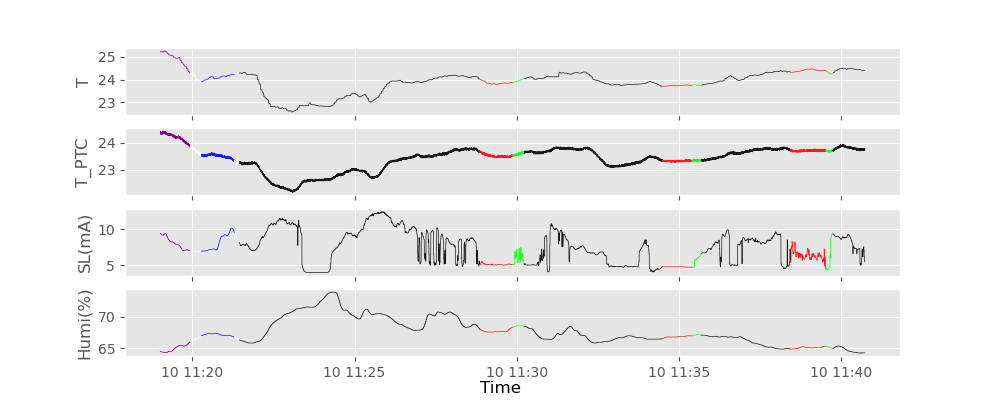

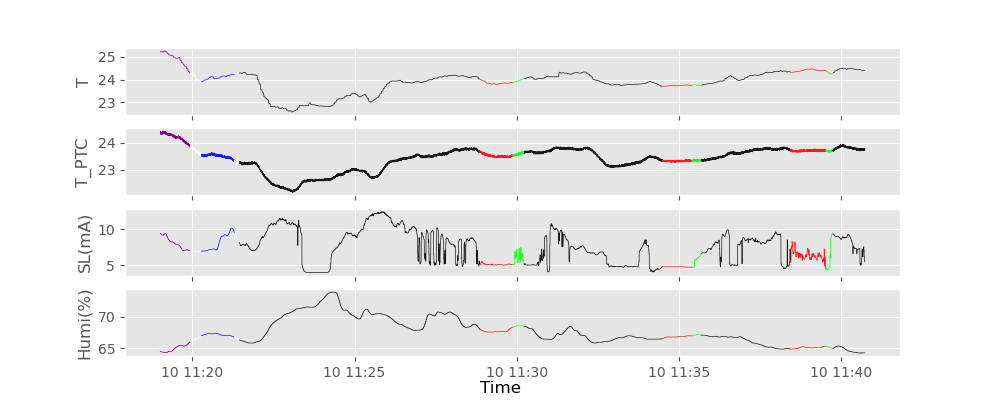

In [112]:
plot_traces({
    'T': datapicker.dataset.streams.TK.AirQuality.Temperature.data/100,
    'T_PTC': datapicker.dataset.streams.TK.PTC.AirTemp.data/100,
    'SL(mA)': datapicker.dataset.streams.TK.Dual0_20mA.SolarLight.data/1000000,
    'Humi(%)':datapicker.dataset.streams.TK.Humidity.Humidity.data/100,
    }, 
    segments = chk_segments)

#### 3.2. Plot PMs

c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


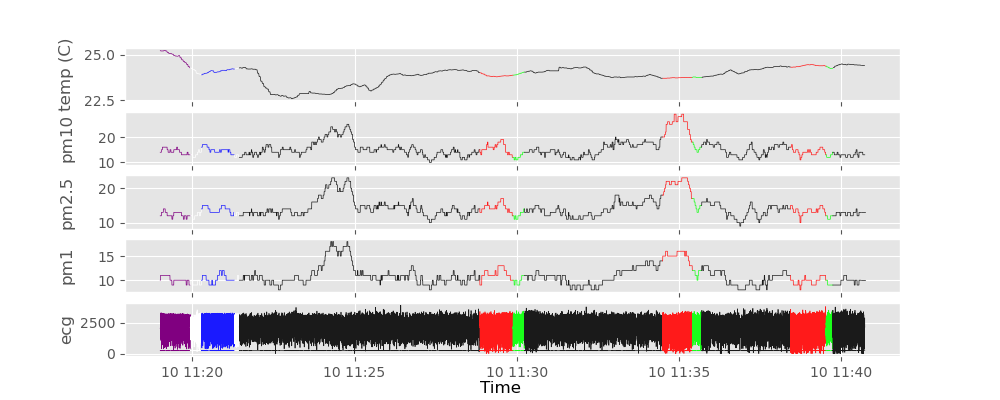

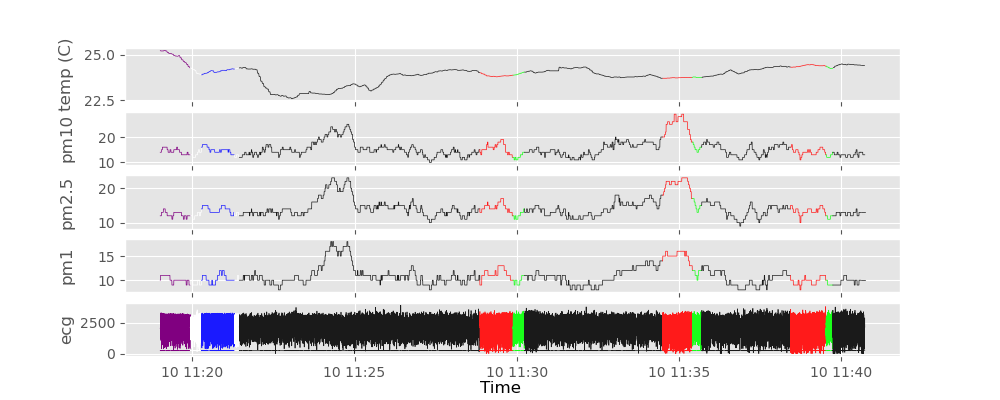

In [73]:
plot_traces({
    'pm10': datapicker.dataset.streams.TK.ParticulateMatter.PM10_0.data,
    'pm2.5':datapicker.dataset.streams.TK.ParticulateMatter.PM2_5.data,
    'pm1':datapicker.dataset.streams.TK.ParticulateMatter.PM1_0.data,
    }, 
    segments = chk_segments)

#### 3.2. Plot Empatica

In [87]:
datapicker.dataset.streams.Empatica.data.Accelerometer

DotMap(_ipython_display_=DotMap(), _repr_mimebundle_=DotMap())

c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


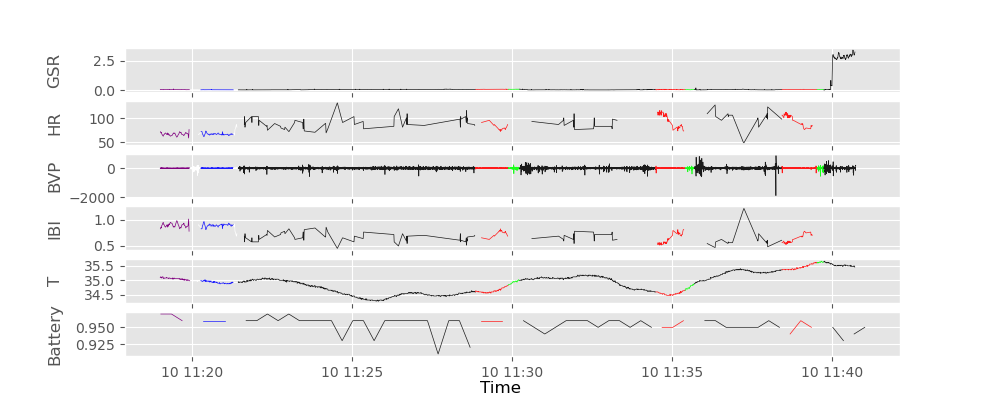

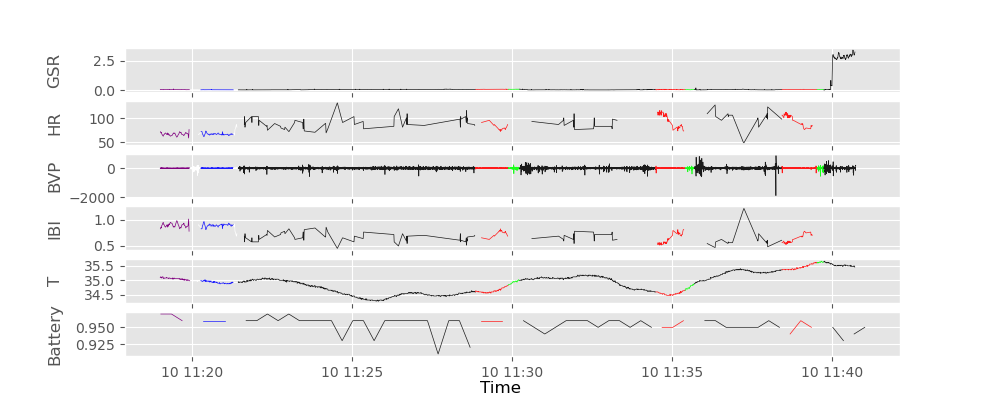

In [89]:
plot_traces({
    'GSR': datapicker.dataset.streams.Empatica.data.E4_Gsr['Value'],
    'HR': datapicker.dataset.streams.Empatica.data.E4_Hr['Value'],
    'BVP': datapicker.dataset.streams.Empatica.data.E4_Bvp['Value'],
    'IBI': datapicker.dataset.streams.Empatica.data.E4_Ibi['Value'],
    'T': datapicker.dataset.streams.Empatica.data.E4_Temperature['Value'],
    'Battery': datapicker.dataset.streams.Empatica.data.E4_Battery['Value'],
    }, 
    segments = chk_segments)

In [116]:
datapicker.dataset.streams.PupilLabs.Counter.Gaze

Value
Seconds                              
2024-05-10 11:18:26.641653113       0
2024-05-10 11:18:26.692661113       1
2024-05-10 11:18:26.692661113       2
2024-05-10 11:18:26.692661113       3
2024-05-10 11:18:26.692661113       4
...                               ...
2024-05-10 11:40:43.923669113  262314
2024-05-10 11:40:43.923669113  262315
2024-05-10 11:40:43.923669113  262316
2024-05-10 11:40:43.923669113  262317
2024-05-10 11:40:43.923669113  262318

[262319 rows x 1 columns]

### 4. Export Data to CSV

In [44]:
"""
Use this cell to obtain other types of information from the datapicker object.
For example, the following code will display the type of the geodata attribute.
Use it to export some information.
"""
# Save as geojson file (without separated coordinates)
# datapicker.geodata.to_file(r'C:\git\JoaoAmaro2001\notebooks\src\output\geodata.geojson', driver='GeoJSON') 

# Get GPS coordinates
coords = datapicker.geodata.geometry.get_coordinates(include_z=True)
# coords.rename(columns = {'y':'latitude', 'x':'longitude','z':'elevation'}, inplace = True) # rename if needed
dataexport = datapicker.geodata.join(coords).drop(columns=['geometry'])

# datapicker.geodata <class 'geopandas.geodataframe.GeoDataFrame'>
dataexport.to_csv(r'C:\Users\joaop\git\JoaoAmaro2001\notebooks\src\output\geodata.csv') # Save the data to a csv file



c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


### 5. EEG

In [59]:
eeg = datapicker.dataset.streams.EEG
""" Additional information about the dataset
"""
print(dir(datapicker.dataset.streams.EEG))
print(dir(datapicker.dataset.streams.EEG.data.np_markers)) # See attributes of the data
print(datapicker.dataset.streams.EEG_dir__) # See type of data


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_rootfolder', 'add_clock_offset', 'align_to_harp', 'autoalign', 'autoload', 'clockreference', 'convert_to_si', 'data', 'device', 'export_to_csv', 'load', 'parent_dataset', 'plot', 'reload', 'resample', 'rootfolder', 'server_lsl_marker', 'slice', 'streamlabel', 'streamtype']
['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__'

In [48]:
print(eeg.data.np_eeg.shape) # Get the shape (dims) of the EEG data
print(eeg.data._NedfReader__get_info()) # Get the information of the EEG data

(799977, 32)
{"NEDFversion": "1.4", "StepDetails": {"StepName": "EXP4", "StartDate_firstEEGTimestamp": "1715592245520", "DeviceClass": "ENOBIO", "DeviceID": "COM10", "SoftwareVersion": "NIC v2.0.11.7", "FirmwareVersion": "3031", "CommunicationType": "USB", "OperativeSystem": null, "SDCardFilename": "NONE", "NOISEFilter": "NONE", "AdditionalChannel": "NONE", "EOGCorrectionStatus": "NONE"}, "EEGSettings": {"TotalNumberOfChannels": "32", "NumberOfEEGChannels": "32", "NumberOfRecordsOfEEG": "799977", "EEGSamplingRate": "500", "EEGRecordingDuration": "5400", "NumberOfPacketsLost": "0", "LineFilterStatus": "50 Hz", "FIRFilterStatus": "OFF", "EOGFilterStatus": "OFF", "ReferenceFilterStatus": "OFF", "EEGUnits": "nV", "EEGMontage": {"Channel1": "P7", "Channel2": "P4", "Channel3": "Cz", "Channel4": "Pz", "Channel5": "P3", "Channel6": "P8", "Channel7": "O1", "Channel8": "O2", "Channel9": "T8", "Channel10": "F8", "Channel11": "C4", "Channel12": "F4", "Channel13": "Fp2", "Channel14": "Fz", "Channel

#### 5.1. Events

In [68]:
revts = datapicker.dataset.streams.EEG.server_lsl_marker
evts = revts[revts.MarkerIdx>35000]
print(evts)# Type -> <class 'pandas.core.frame.DataFrame'>
if len(evts[evts.MarkerIdx<35099])>4: # Check if acquisition has baseline
    baseline=True
else:
    baseline=False
print(baseline)



                          Seconds  LslTimestamp  MarkerIdx  EegSample  \
3   2024-05-10 11:19:00.453653113   5924.969283      35001      21210   
8   2024-05-10 11:19:56.011669113   5980.527309      35002      48988   
11  2024-05-10 11:20:16.608661113   6001.124472      35003      59287   
17  2024-05-10 11:21:17.878677113   6062.394188      35004      89920   
18  2024-05-10 11:21:26.727669113   6071.243309      35005      94344   
58  2024-05-10 11:28:51.697653113   6516.214352      35101     316820   
63  2024-05-10 11:29:53.010677113   6577.526918      35201     347475   
66  2024-05-10 11:30:14.245653113   6598.761959      35301     358092   
90  2024-05-10 11:34:29.563669113   6854.081321      35102     485747   
95  2024-05-10 11:35:24.953653113   6909.471251      35202     513441   
97  2024-05-10 11:35:42.076661113   6926.593971      35302     522002   
113 2024-05-10 11:38:26.338677113   7090.856580      35103     604130   
120 2024-05-10 11:39:32.013653113   7156.531087    

#### 5.2. Plot with EEG

c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


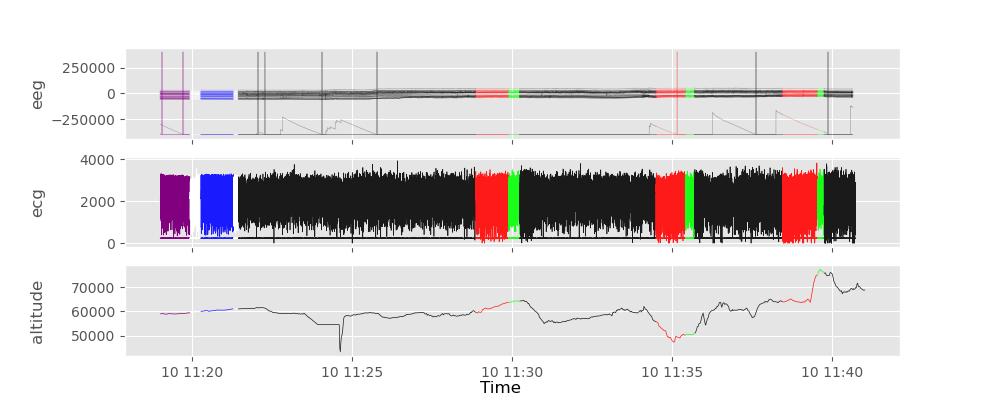

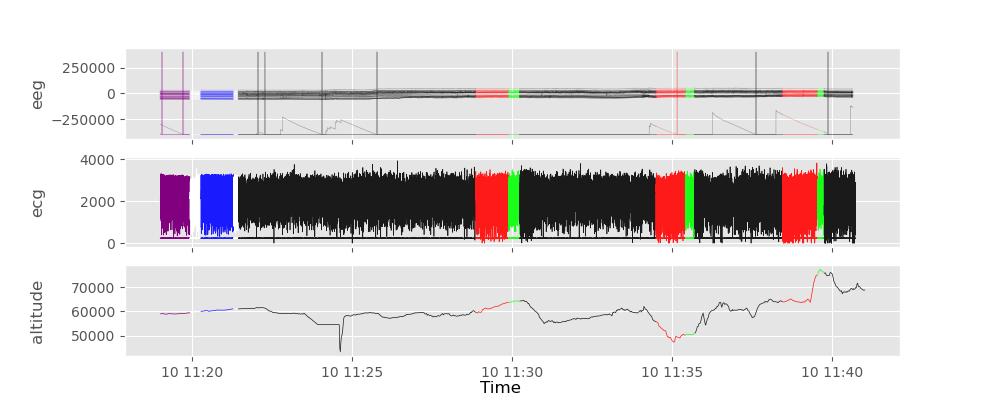

c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\ipympl\backend_nbagg.py:279: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.manager.handle_json(content)


In [90]:
plot_traces({
    'eeg': datapicker.dataset.streams.EEG.data,    
    'ecg': datapicker.dataset.streams.BioData.ECG.data,
    'altitude': datapicker.dataset.georeference.elevation,
    }, 
    segments = chk_segments
    # figsize = (16,8)
    )

In [ ]:
# Plot the data
eeg.data.np_eeg[14622, 1]
plt.plot(eeg.data.np_eeg)  # np_eeg is a numpy array with the EEG data - for processing purposes
plt.xlim(evts['EegSample'].iloc[0], evts['EegSample'].iloc[-1])  # Set x-axis limits (beginning and end of the event)
plt.show()

#### 5.3. Export EEG to EEGLAB (.set)

In [ ]:
"""Required packages
pip install eeglabio
pip install mne
"""
import mne
from eeglabio.utils import export_mne_raw
raw = mne.io.read_raw(...)
export_mne_raw(raw, "file_name.set")

In [55]:
%whos
help(mne.io.read_raw_nedf) # important to use this function?
import inspect
print(inspect.getsource(mne.io.read_raw_nedf))

Variable                          Type                Data/Info
---------------------------------------------------------------
Contact                           type                <class 'pluma.export.ogcapi.records.Contact'>
DataFrame                         type                <class 'pandas.core.frame.DataFrame'>
Dataset                           type                <class 'pluma.schema.Dataset'>
DatasetRecord                     type                <class 'pluma.export.ogca<...>i.records.DatasetRecord'>
FileChooser                       MetaHasTraits       <class 'ipyfilechooser.filechooser.FileChooser'>
Georeference                      type                <class 'pluma.stream.georeference.Georeference'>
GridSpec                          type                <class 'matplotlib.gridspec.GridSpec'>
HarpStream                        type                <class 'pluma.stream.harp.HarpStream'>
MaxNLocator                       type                <class 'matplotlib.ticker.MaxNLocator'>

In [63]:
import os

import glob
datafolder = datapicker._pathlist.value
nedf_files = glob.glob(os.path.join(datafolder, '*.nedf'))
if nedf_files:
    filename = nedf_files[0]
else:
    print("No .nedf files found in the directory.")
print(filename)
eeg_nedf = mne.io.read_raw_nedf(filename, preload=False, verbose=None)
print(type(eeg_nedf))

I:\João\Exp_4-outdoor_experiment\OE028\Lisbon_Baixa_sub-OE104028_2024-05-13T092413Z\20240513102405_OE104028_EXP4.nedf
<class 'mne.io.nedf.nedf.RawNedf'>


In [62]:
print(type(eeg_nedf))
print(dir(eeg_nedf))

<class 'mne.io.nedf.nedf.RawNedf'>
['__class__', '__contains__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_annotations', '_cals', '_check_bad_segment', '_comp', '_cropped_samp', '_dtype', '_dtype_', '_extra_attributes', '_filenames', '_first_samps', '_first_time', '_get_buffer_size', '_get_channel_positions', '_getitem', '_handle_tmin_tmax', '_init_kwargs', '_last_samps', '_last_time', '_orig_units', '_parse_get_set_params', '_pick_drop_channels', '_pick_projs', '_preload_data', '_projector', '_projectors', '_raw_extras', '_raw_lengths', '_read_comp_grade', '_read_picks', '_read_segment', '_read_segment_file'

### 6. Export Dataset to OGC API

In [ ]:
record = DatasetRecord(datapicker.dataset, datapicker.geodata, properties=RecordProperties(
    title='<City> Outdoor Walk: <CityRegion> Subject <ID>',
    description='Outdoor walk data collection',
    license='CC BY-NC 4.0',
    tool='Bonsai',
    keywords=['<City>', 'Outdoor', 'Walk', 'Microclimate', 'Biosignals'],
    contacts=[
        Contact(
            name='Your Name',
            institution='Your Institution',
            email='youremail@yourdomain.com'
        )
    ],
    themes=[]
))

In [ ]:
rpath = Path(record.id)
export_geoframe_to_geojson(datapicker.geodata, rpath.with_suffix('.geojson'))
with open(rpath.with_suffix('.json'), 'w') as f:
    f.write(record.to_json())

### Support

#### Quesions for NGR

- [x] How can I make plots interactable? I want to zoom in and out. Furthermore, I want to check different timepoints.
- [x] Meaning of EEG events?
- [ ] Can I overlap maps on the openstreetmap plot? Such as a .kmz file.
- [x] How can I see pupilabs eye-tracking data?
- [ ] How to export to SDI? Should I do it?
- [x] Why is empatica_hr black in most places?
- [ ] Can `eeg.py` use MNE's nedf import function? It would easily allow exporting data to matlab.
- [ ] Can we change the base map? OpenStreetMaps has different views.
- [ ] Will you update the datapicker.geodata columns (e.g. skin surface temperature)?  
- [ ] What warning is this?
```python
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\pandas\core\frame.py:706: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
```
- [x] Why can I not load `I:\João\Exp_4-outdoor_experiment\OE003\Lisbon_Baixa_sub-OE104003_2024-04-16T160350Z\`? TIM.csv problem.
```python
{
	"name": "KeyError",
	"message": "'Class'",
	"stack": "---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\ipyfilechooser\\filechooser.py:317, in FileChooser._on_select_click(self, _b)
    315 if self._callback is not None:
    316     try:
--> 317         self._callback(self)
    318     except TypeError:
    319         # Support previous behaviour of not passing self
    320         self._callback()

File c:\\git\\JoaoAmaro2001\
otebooks\\src\\ingestion\\modules.py:43, in create_datapicker.<locals>.dataset_changed(chooser)
     41 display(chooser)
     42 print(f\"Loading dataset: {Path(chooser.selected_path).name}...\" )
---> 43 dataset = load_dataset(chooser.selected_path, schema=custom_schema)
     44 print(f\"Dataset: {dataset} loaded successfully, and {'not' if not dataset.has_calibration else 'sucessfully'} calibrated.\" )
     45 plot_summary(dataset)

File c:\\git\\JoaoAmaro2001\
otebooks\\src\\ingestion\\helpers.py:27, in load_dataset(root, schema, reload, export_path)
     22 dataset.populate_streams(autoload=False)  # Add the \"schema\" that we want to load to our Dataset. If we want to load the whole dataset automatically, set autoload to True.
     24 if reload:
     25     # We will just load every single stream at the same time. This might take a while if loading from AWS
     26     # Some warnings will be printed if some sensors were not acquired during the experiment. These are normal and can be usually ignored.
---> 27     dataset.reload_streams(force_load=True)
     28     sync_lookup = dataset.calibrate_ubx_to_harp()
     29     dataset.add_ubx_georeference()

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pluma\\schema\\__init__.py:113, in Dataset.reload_streams(self, force_load)
    111 for stream in self._iter_schema_streams(self.streams):
    112     if force_load is True:
--> 113         stream.load()
    114     else:
    115         if stream.autoload is True:

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pluma\\stream\\ubx.py:29, in UbxStream.load(self)
     28 def load(self):
---> 29 \tself.load_event_list(self.autoload_messages)

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pluma\\stream\\ubx.py:46, in UbxStream.load_event_list(self, events)
     44 def load_event_list(self, events: list):
     45 \tfor event in events:
---> 46 \t\tself.load_event(event)

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pluma\\stream\\ubx.py:33, in UbxStream.load_event(self, event)
     31 \tdef load_event(self, event: _UBX_MSGIDS):
     32 \t\tself._update_dotmap(event,
---> 33                       load_ubx_event_stream(
     34                           event,
     35                           root=self.rootfolder)
     36                       )

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pluma\\io\\ubx.py:158, in load_ubx_event_stream(ubxmsgid, root, ubxfolder)
    152 bin_file = load_ubx_bin_event(ubxmsgid=ubxmsgid,
    153                               root=root,
    154                               ubxfolder=ubxfolder)
    155 csv_file = load_ubx_harp_ts_event(ubxmsgid=ubxmsgid,
    156                                   root=root,
    157                                   ubxfolder=ubxfolder)
--> 158 if (bin_file['Class'].values == csv_file['Class'].values).all():
    159     bin_file['Seconds'] = csv_file.index
    160     bin_file = bin_file.set_index('Seconds')

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pandas\\core\\frame.py:4090, in DataFrame.__getitem__(self, key)
   4088 if self.columns.nlevels > 1:
   4089     return self._getitem_multilevel(key)
-> 4090 indexer = self.columns.get_loc(key)
   4091 if is_integer(indexer):
   4092     indexer = [indexer]

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pandas\\core\\indexes\\range.py:417, in RangeIndex.get_loc(self, key)
    415         raise KeyError(key) from err
    416 if isinstance(key, Hashable):
--> 417     raise KeyError(key)
    418 self._check_indexing_error(key)
    419 raise KeyError(key)

KeyError: 'Class'"
}
```
- [ ] Why can I not load `Lisbon_Belem_sub-OE101005_2024-05-10T111823Z` (after gps synch fix)?
```python
Failed Stream Harp stream from device 		TK, stream GPS_Latitude(227): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_Longitude(228): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_Altitude(229): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_HasFix(232): Input dataframe is empty.
```
- [ ] Why do I get this output from loading utci into map? Not a geopandas? Is it important?
```python
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\pandas\core\frame.py:706: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\pandas\core\frame.py:706: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\pandas\core\frame.py:706: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\pandas\core\frame.py:706: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\git\JoaoAmaro2001\notebooks\.conda\Lib\site-packages\pandas\core\frame.py:706: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
```


#### Testing

In [ ]:
# Testing the plot_traces function (OE102009)
plot_traces({
    'T(C)': datapicker.dataset.streams.TK.AirQuality.Temperature.data/100,
    'altitude': datapicker.dataset.georeference.elevation,
    'ecg': datapicker.dataset.streams.BioData.ECG.data,
    'eeg': datapicker.dataset.streams.EEG.data,
    'gsr': datapicker.geodata.empatica_e4_gsr,
    }, 
    segments=[
    (evts['Seconds'][beg.item()], [0.1, 0.1, 0.1]), 
    (evts['Seconds'][5], [1, 0.1, 0.1]),
    (evts['Seconds'][11], [0.1, 1, 0.1]),
    (evts['Seconds'][14], [0.1, 0.1, 0.1]),
    (evts['Seconds'][22], [1, 0.1, 0.1]),
    (evts['Seconds'][28], [0.1, 1, 0.1]),
    (evts['Seconds'][31], [0.1, 0.1, 0.1]),
    (evts['Seconds'][92], [1, 0.1, 0.1]),
    (evts['Seconds'][99], [0.1, 1, 0.1]),
    (evts['Seconds'][102], [0.1, 0.1, 0.1])
    ],
    figsize = (40,10)
    )